In [1]:
from model import LinearRegression
from scaler import StandardScaler
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('input\\train.csv', encoding='big5')
train_data.drop(columns=u'測站', inplace=True)
train_data.replace('NR', 0, inplace=True)

for i in range(24):
    train_data['%d' % i] = train_data['%d' % i].astype('float64')
measure_name = train_data.iloc[0:18, 1]

result = []
day = 1
month = 1

for i in range(0, train_data.shape[0], 18):
    temp = train_data.iloc[i:i+18, 2:].T
    temp.columns = measure_name
    temp.insert(loc=0, column='month', value='%d' % month)
    temp.insert(loc=1, column='day', value='%d' % day)
    temp.insert(loc=2, column='hr', value=temp.index)
    result.append(temp)
    if day < 20:
        day += 1
    else:
        day = 1
        month += 1
train = pd.concat(result, ignore_index=True)
train.columns.name = None

test_data = pd.read_csv('input\\test.csv', header=None, encoding='big5')
test_data.replace('NR', 0, inplace=True)
for i in range(2, 11):
    test_data.iloc[:, i] = test_data.iloc[:, i].astype('float64')
measure_name = test_data.iloc[0:18, 1]

result = []
id_ = 0

for i in range(0, test_data.shape[0], 18):
    temp = test_data.iloc[i:i+18, 2:].T
    temp.columns = measure_name
    temp.insert(loc=0, column='ID', value='id_%d' % id_)
    temp.insert(loc=1, column='hr', value=temp.index-1)
    result.append(temp)
    id_ +=1
        
test = pd.concat(result, ignore_index=True)
test.columns.name = None
train.tail(18)

,month,day,hr,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,...,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
5742,12,20,6,14.0,1.7,0.15,0.03,0.3,4.4,4.8,...,7.0,0.0,0.0,82.0,1.1,1.7,66.0,59.0,2.1,2.1
5743,12,20,7,14.0,1.7,0.21,0.05,0.8,7.3,8.1,...,19.0,2.0,0.0,81.0,1.8,1.8,70.0,83.0,3.7,2.0
5744,12,20,8,14.0,1.7,0.20,0.09,1.4,7.6,9.0,...,17.0,2.0,0.0,81.0,2.0,1.8,66.0,106.0,2.8,2.0
5745,12,20,9,15.0,1.7,0.22,0.09,2.0,8.1,10.0,...,31.0,8.0,0.0,75.0,2.3,1.8,85.0,105.0,3.8,1.7
5746,12,20,10,15.0,1.7,0.22,0.07,1.9,7.0,8.9,...,19.0,8.0,0.0,67.0,2.7,1.8,67.0,60.0,4.1,3.0
5747,12,20,11,16.0,1.7,0.23,0.07,1.5,6.5,8.0,...,25.0,10.0,0.0,62.0,2.8,1.8,60.0,62.0,3.2,2.9
5748,12,20,12,17.0,1.7,0.24,0.06,1.5,6.4,7.9,...,18.0,4.0,0.0,59.0,2.6,1.8,61.0,58.0,3.1,2.7
5749,12,20,13,18.0,1.7,0.23,0.05,1.3,5.7,7.0,...,20.0,1.0,0.0,56.0,2.4,1.8,60.0,75.0,2.8,2.8
5750,12,20,14,19.0,1.7,0.24,0.08,1.3,6.1,7.4,...,8.0,1.0,0.0,53.0,2.6,1.8,59.0,18.0,2.3,1.3
5751,12,20,15,18.0,1.7,0.27,0.11,1.3,8.0,9.3,...,13.0,7.0,0.0,56.0,2.8,1.8,308.0,311.0,2.6,1.7


In [4]:
# train['TEMP_DIFF'] = train['AMB_TEMP'].diff()
# test['TEMP_DIFF'] = test['AMB_TEMP'].diff()
train['month'] = train['month'].astype('int64')
train['day'] = train['day'].astype('int64')
train['hr'] = train['hr'].astype('int64')

In [5]:
train['Y'] = train['PM2.5'].shift(-1)
train.drop(train[(train['hr'] == 23) & (train['day'] == 20)].index, inplace=True)
# train.rename(columns={'PM2.5':'PM2.5_P0'}, inplace=True)
train['PM2.5_P0'] = train['PM2.5'].copy()
test['PM2.5_P0'] = test['PM2.5'].copy()

In [6]:
for i in range(1, 5):
    train['PM2.5_P%d' % (i)] = train['PM2.5'].shift(i)
    test['PM2.5_P%d' % (i)] = test['PM2.5'].shift(i)

condition = (train['hr'] >= 0) & (train['hr'] <= 4) & (train['day'] == 1)
train.drop(train[condition].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [7]:
features_PM25 = ['PM2.5_P%d' % x for x in range(0, 5)]
train_X = train[['day', *features_PM25]].copy()
test_X = test[['ID', *features_PM25]].copy()
features = ['PM10', 'NO2', 'SO2', 'THC']
# features = ['PM10', 'NO2', 'SO2', 'THC', 'RAINFALL', 'NOx']
scaler = dict()
for ft in features:
    scaler[ft] = StandardScaler()
    scaler[ft].fit(train[ft].to_numpy())
    train_X[ft] = scaler[ft].transform(train[ft].to_numpy())
    test_X[ft] = scaler[ft].transform(test[ft].to_numpy())

# train_X['PM10'] = standard_scaler_transform(train)

In [8]:
trainX_set = []
trainX_set.append(train_X[train_X['day'] <= 5].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 5) & (train_X['day'] <= 10)].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 10) & (train_X['day'] <= 15)].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 15) & (train_X['day'] <= 20)].drop(columns='day').reset_index(drop=True))

train_Y = train[['day', 'Y']].copy()
trainY_set = []
trainY_set.append(train_Y[train_Y['day'] <= 5].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 5) & (train_Y['day'] <= 10)].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 10) & (train_Y['day'] <= 15)].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 15) & (train_Y['day'] <= 20)].drop(columns='day').reset_index(drop=True))

In [9]:
lr = []
score = []
loss_trend = []
weight = []
for i in range(4):
    all_ = list(range(4))
    all_.remove(i)
    to_train_X = pd.concat([trainX_set[all_[0]], trainX_set[all_[1]], trainX_set[all_[2]]])
    to_train_Y = pd.concat([trainY_set[all_[0]], trainY_set[all_[1]], trainY_set[all_[2]]])
    to_test_X = trainX_set[i].copy()
    to_test_Y = trainY_set[i].copy()
    
    lr.append(LinearRegression(max_iter=1000, eta0=10, learning_rate='Adagrad'))
    weight.append(lr[i].fit(to_train_X.to_numpy(), to_train_Y['Y'].to_numpy()))
    loss_trend.append(lr[i].loss_trend())
    score.append(lr[i].score(to_test_X.to_numpy(), to_test_Y['Y'].to_numpy()))

In [10]:
for i in range(4):
    print(loss_trend[i][-3:])
    print(score[i])

[5.833928325036279, 5.833900767567914, 5.8338733098902775]
0.8371012877259604
[6.245010082699577, 6.244980999930123, 6.244952017739018]
0.884090084797208
[5.948543145829566, 5.948512821016491, 5.948482610006469]
0.8608999187166926
[5.993586889769481, 5.9935632343956815, 5.993539663223658]
0.87982886593408


In [34]:
weight

[array([ 3.41854128,  0.99653595, -0.01775004, -0.44166775,  0.34548452,
        -0.05137511,  1.10917591,  0.67652095,  0.6272299 ,  0.45201738]),
 array([ 3.43490746,  0.98778319,  0.00583994, -0.45976302,  0.37807567,
        -0.07486609,  1.09015216,  0.46448473,  0.53275539,  0.58836955]),
 array([ 3.38018569,  1.00130922, -0.0239021 , -0.4667643 ,  0.41437667,
        -0.08717384,  1.21328539,  0.37323027,  0.70082082,  0.4419736 ]),
 array([ 3.45381394,  0.97525785,  0.00367234, -0.45620658,  0.38240904,
        -0.07233567,  1.20731155,  0.46706311,  0.61202377,  0.43783589])]

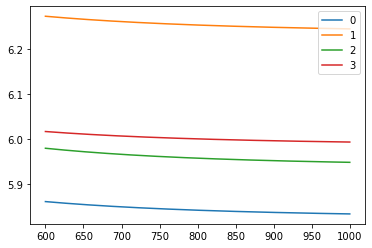

In [19]:
for i in range(4):
    plt.plot(np.arange(600, len(loss_trend[i])+1), loss_trend[i][599:], label=i)
plt.legend(loc='upper right')

In [13]:
kk_x = train_X.sample(n=240, random_state=1).drop(columns='day')
kk_y = train_Y.sample(n=240, random_state=1)

In [14]:
lr[3].score(kk_x.to_numpy(), kk_y['Y'].to_numpy())

0.8608992989869652

In [33]:
lr_all = LinearRegression(max_iter=1000, eta0=5, learning_rate='Adagrad')
lr_all.fit(train_X.drop(columns='day').to_numpy(), train_Y['Y'].to_numpy())

array([ 3.43559606,  0.9903859 , -0.00829745, -0.45727896,  0.38219154,
       -0.07284319,  1.16747041,  0.48803091,  0.61954002,  0.4823243 ])

In [36]:
lr_all.loss_trend()[-3:]

[6.009316064339609, 6.0092901930379705, 6.009264415826295]

In [37]:
test_X_9 = test_X.iloc[[i for i in range(8, 2160, 9)]]
test_X_9.head()

,ID,PM2.5_P0,PM2.5_P1,PM2.5_P2,PM2.5_P3,PM2.5_P4,PM10,NO2,SO2,THC
8,id_0,4.0,9.0,17.0,18.0,18.0,-0.675298,-0.831288,-0.202607,0.330852
17,id_1,18.0,17.0,29.0,23.0,17.0,-0.370247,0.458338,-0.641210,0.330852
26,id_2,26.0,38.0,47.0,55.0,61.0,1.269406,0.619542,0.290821,-0.217803
35,id_3,4.0,4.0,7.0,13.0,20.0,-1.209139,-0.831288,-0.860511,-0.217803
44,id_4,30.0,32.0,23.0,11.0,8.0,1.193143,-0.525002,0.839074,-0.766458


In [45]:
test_Y = pd.DataFrame()
test_Y['id'] = ['id_%d' % i for i in range(240)]
test_Y['value'] = lr_all.predict(test_X_9.drop(columns='ID').to_numpy())
test_Y.head(20)

,id,value
0,id_0,3.956960
1,id_1,14.966221
2,id_2,25.814788
3,id_3,5.219123
4,id_4,27.272501
5,id_5,21.864902
6,id_6,24.412040
7,id_7,29.922987
8,id_8,15.982121
9,id_9,60.088116


In [47]:
test_Y.to_csv('./output/submission_1090702.csv', index=None)